In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#lay du lieu 
path = '/home/phuongthao/bigdata/product.csv'
df = pd.read_csv(path)
df.head(10)

,Date,Time,Page Name,Product Name,Category,Origin,Reaction,Comments,Shared,Age Value,Age,Male_Value,Female_value
0,04/04/2022,8:11:00 PM,Wear,Baby Dress,Baby Essentials,Bangladeshi,118,189,498,27,11-30,24575,44528
1,07/06/2022,5:00:00 PM,Shopno Chowa,Baby Dress,Baby Essentials,Bangladeshi,375,182,12,22,11-30,43980,3465
2,07/06/2022,3:42:00 PM,NUVIA,Baby Dress,Baby Essentials,Bangladeshi,121,87,14,23,11-30,31593,26716
3,07/07/2022,3:58:00 PM,NUVIA,Kid Toys,Baby Essentials,Chinese,290,37,19,52,41-60,2906,31611
4,08/08/2022,3:42:00 PM,Babies Collection,Baby Hem,Baby Essentials,Bangladeshi,4200,3100,248,61,Tren 60,22511,24528
5,08/08/2022,9:20:00 PM,Little & Misses,Baby item,Baby Essentials,Bangladeshi,5200,4200,694,44,41-60,26157,24989
6,08/11/2022,3:26:00 PM,NUVIA,Baby Dress,Baby Essentials,Bangladeshi,172,25,19,54,41-60,32741,35095
7,11/23/2022,6:16:00 PM,Showkhin,Baby Dress,Baby Essentials,Bangladeshi,2400,896,111,42,41-60,2641,15872
8,12/19/2022,10:41:00 PM,TOT,Baby Dress,Baby Essentials,Indian,958,112,22,33,31-40,48180,35535
9,12/26/2022,5:58:00 PM,Karigor Craft,Baby Party Dress & Lehenga,Baby Essentials,Indian,49000,2200,304,36,31-40,34037,26769


In [51]:
print(df['Date'].dtype)

object


In [4]:
#add thang vua tach ra tu cot Date vao cot Month
df['Month'] = df['Date'].str.slice(0,2,1)
df.head(10)

,Date,Time,Page Name,Product Name,Category,Origin,Reaction,Comments,Shared,Age Value,Age,Male_Value,Female_value,Month
0,04/04/2022,8:11:00 PM,Wear,Baby Dress,Baby Essentials,Bangladeshi,118,189,498,27,11-30,24575,44528,04
1,07/06/2022,5:00:00 PM,Shopno Chowa,Baby Dress,Baby Essentials,Bangladeshi,375,182,12,22,11-30,43980,3465,07
2,07/06/2022,3:42:00 PM,NUVIA,Baby Dress,Baby Essentials,Bangladeshi,121,87,14,23,11-30,31593,26716,07
3,07/07/2022,3:58:00 PM,NUVIA,Kid Toys,Baby Essentials,Chinese,290,37,19,52,41-60,2906,31611,07
4,08/08/2022,3:42:00 PM,Babies Collection,Baby Hem,Baby Essentials,Bangladeshi,4200,3100,248,61,Tren 60,22511,24528,08
5,08/08/2022,9:20:00 PM,Little & Misses,Baby item,Baby Essentials,Bangladeshi,5200,4200,694,44,41-60,26157,24989,08
6,08/11/2022,3:26:00 PM,NUVIA,Baby Dress,Baby Essentials,Bangladeshi,172,25,19,54,41-60,32741,35095,08
7,11/23/2022,6:16:00 PM,Showkhin,Baby Dress,Baby Essentials,Bangladeshi,2400,896,111,42,41-60,2641,15872,11
8,12/19/2022,10:41:00 PM,TOT,Baby Dress,Baby Essentials,Indian,958,112,22,33,31-40,48180,35535,12
9,12/26/2022,5:58:00 PM,Karigor Craft,Baby Party Dress & Lehenga,Baby Essentials,Indian,49000,2200,304,36,31-40,34037,26769,12


In [7]:
# Convert time stamp column to time format
df.index = pd.to_datetime(df['Date']).dt.floor('T')
df = df.iloc[:, 1:]

In [5]:
# Create an auxiliary set of column names in measured values
product_measurement_data = ['Category', 'Reaction', 'Comments', 'Shared']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5518 entries, 0 to 5517
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          5518 non-null   object
 1   Time          5518 non-null   object
 2   Page Name     5518 non-null   object
 3   Product Name  5518 non-null   object
 4   Category      5518 non-null   object
 5   Origin        5518 non-null   object
 6   Reaction      5518 non-null   int64 
 7   Comments      5518 non-null   int64 
 8   Shared        5518 non-null   int64 
 9   Age Value     5518 non-null   int64 
 10  Age           5518 non-null   object
 11  Male_Value    5518 non-null   int64 
 12  Female_value  5518 non-null   int64 
 13  Month         5518 non-null   object
dtypes: int64(6), object(8)
memory usage: 603.7+ KB


In [8]:
# Kiểm tra danh sách các tên cột trong DataFrame
print(df.columns)

Index(['Time', 'Page Name', 'Product Name', 'Category', 'Origin', 'Reaction',
       'Comments', 'Shared', 'Age Value', 'Age', 'Male_Value', 'Female_value',
       'Month'],
      dtype='object')


In [9]:
# Loại bỏ hàng "count" khỏi bảng tóm tắt thống kê
summary = df[product_measurement_data].describe().drop("count")
summary.head()

,Reaction,Comments,Shared
mean,2282.016129,1268.379304,210.309532
std,5012.744407,2168.354940,396.747860
min,31.000000,10.000000,1.000000
25%,492.000000,89.000000,19.000000
50%,1000.000000,262.000000,55.000000


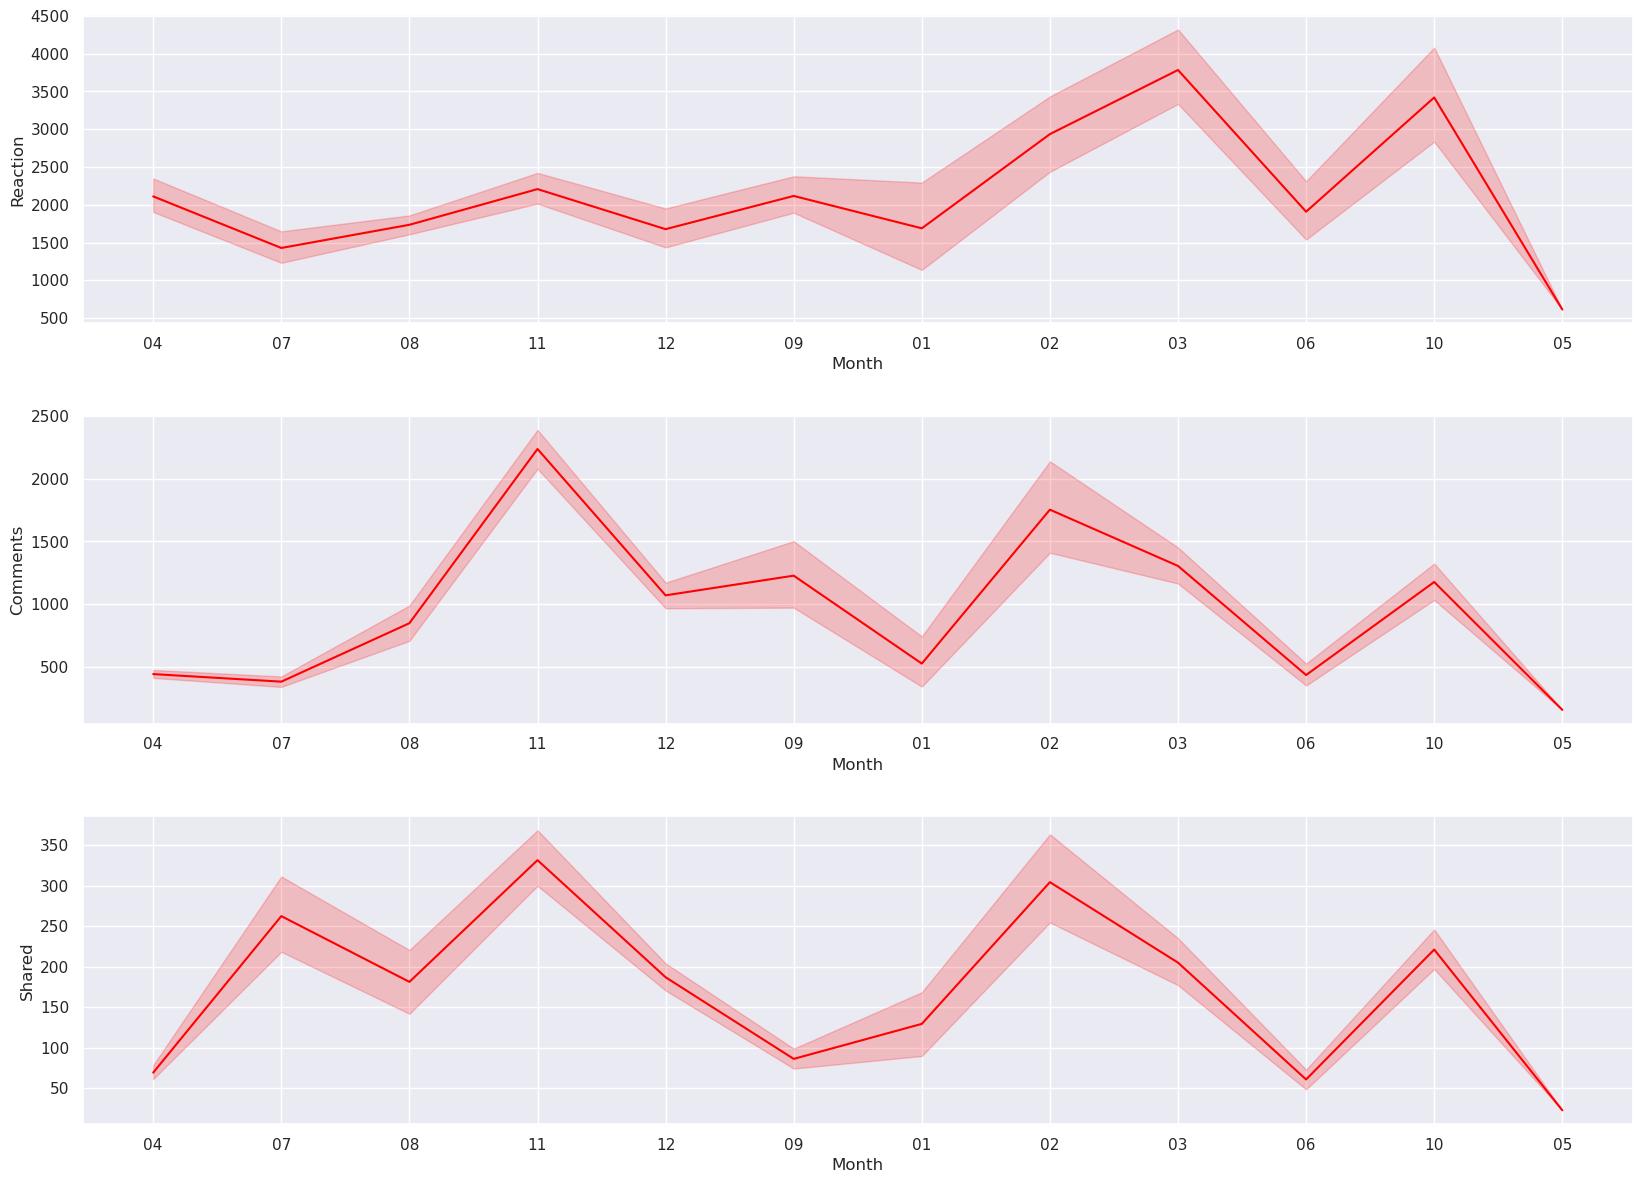

In [10]:

# Hiển thị tóm tắt thống kê cho các cột đã chọn
df[product_measurement_data].describe()

# Màu
color_1 = '#BFAF9D'
color_2 = '#C1C1D5'
color_3 = '#FF0000'

# Display line graphs
plt.figure(figsize=(20, 30))

plt.subplot(611)
sns.lineplot(data=df, x='Month', y='Reaction', color=color_3)

plt.subplot(612)
sns.lineplot(data=df, x='Month', y='Comments', color=color_3)

plt.subplot(613)
sns.lineplot(data=df, x='Month', y='Shared', color=color_3)

plt.subplots_adjust(hspace=0.3)
plt.show()


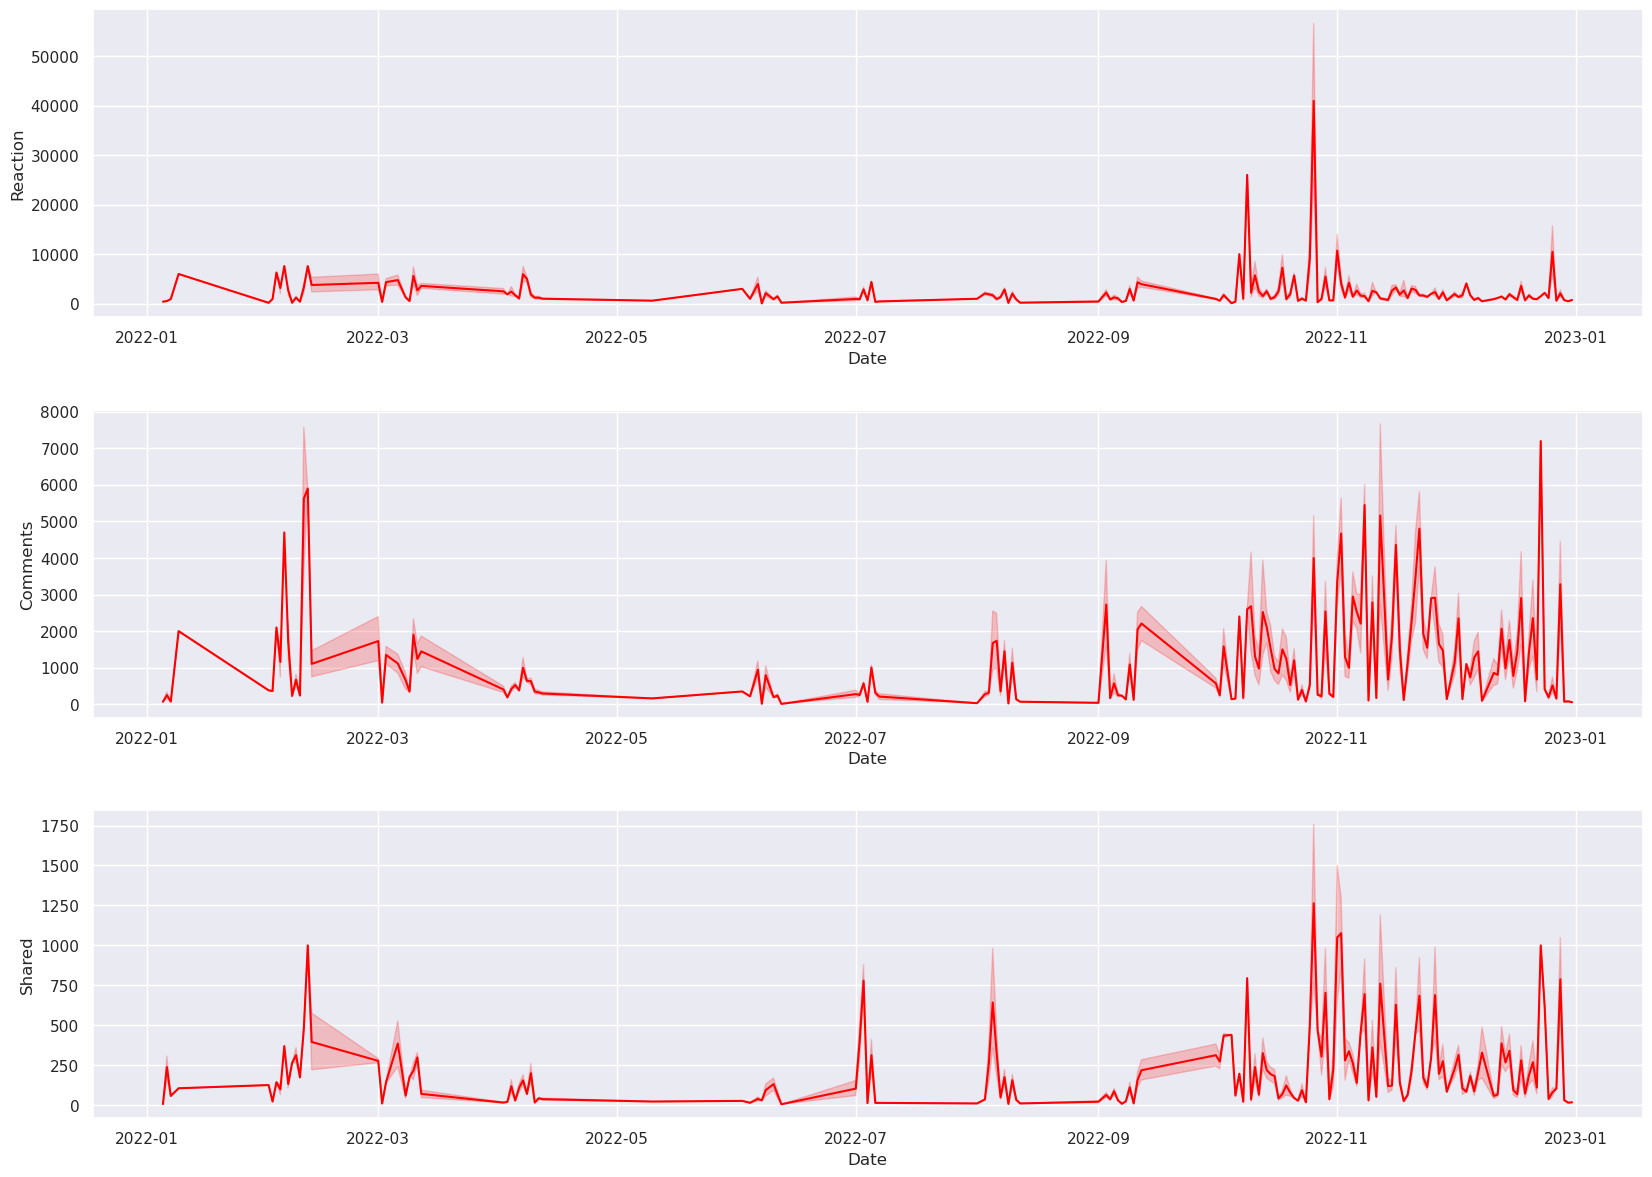

In [11]:
# Hiển thị tóm tắt thống kê cho các cột đã chọn
df[product_measurement_data].describe()

# Màu
color_1 = '#BFAF9D'
color_2 = '#C1C1D5'
color_3 = '#FF0000'

# Display line graphs
plt.figure(figsize=(20, 30))

plt.subplot(611)
sns.lineplot(data=df, x=df.index, y='Reaction', color=color_3)

plt.subplot(612)
sns.lineplot(data=df, x=df.index, y='Comments', color=color_3)

plt.subplot(613)
sns.lineplot(data=df, x=df.index, y='Shared', color=color_3)

plt.subplots_adjust(hspace=0.3)
plt.show()


In [69]:
#train máy dự đoán cột Reaction

In [20]:
df['Date (month)'] = pd.to_datetime(df.index).month
df['Date (day)'] = pd.to_datetime(df.index).day

param_ml_input = ['Date (month)', 'Date (day)', 'Reaction', 'Comments', 'Shared']
param_ml_output = 'Reaction'

X_data = df[param_ml_input]
y_data = df[param_ml_output]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 1/3)

scaler =  StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
mlp = MLPRegressor(max_iter = 5000).fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

result = pd.DataFrame({'Giá trị thực tế (y_test)': y_test,
                       'Giá trị được mô hình dự đoán (y_pred)': y_pred,
                       'Sự khác biệt': abs(y_pred - y_test)})
result.head(10)

,Giá trị thực tế (y_test),Giá trị được mô hình dự đoán (y_pred),Sự khác biệt
Date,,,
2022-12-20,282,281.971412,0.028588
2022-04-10,316,315.767692,0.232308
2022-11-11,2300,2297.574870,2.425130
2022-07-02,513,511.481392,1.518608
2022-11-09,481,480.530735,0.469265
2022-07-02,727,728.034529,1.034529
2022-02-06,4600,4594.049141,5.950859
2022-08-08,1200,1198.348777,1.651223
2022-08-12,212,211.388792,0.611208


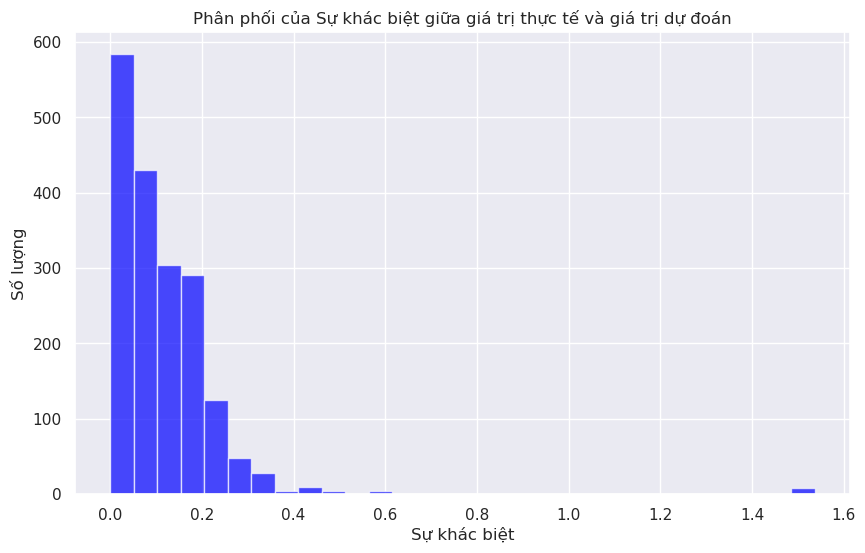

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(result['Sự khác biệt'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Sự khác biệt')
plt.ylabel('Số lượng')
plt.title('Phân phối của Sự khác biệt giữa giá trị thực tế và giá trị dự đoán')
plt.show()


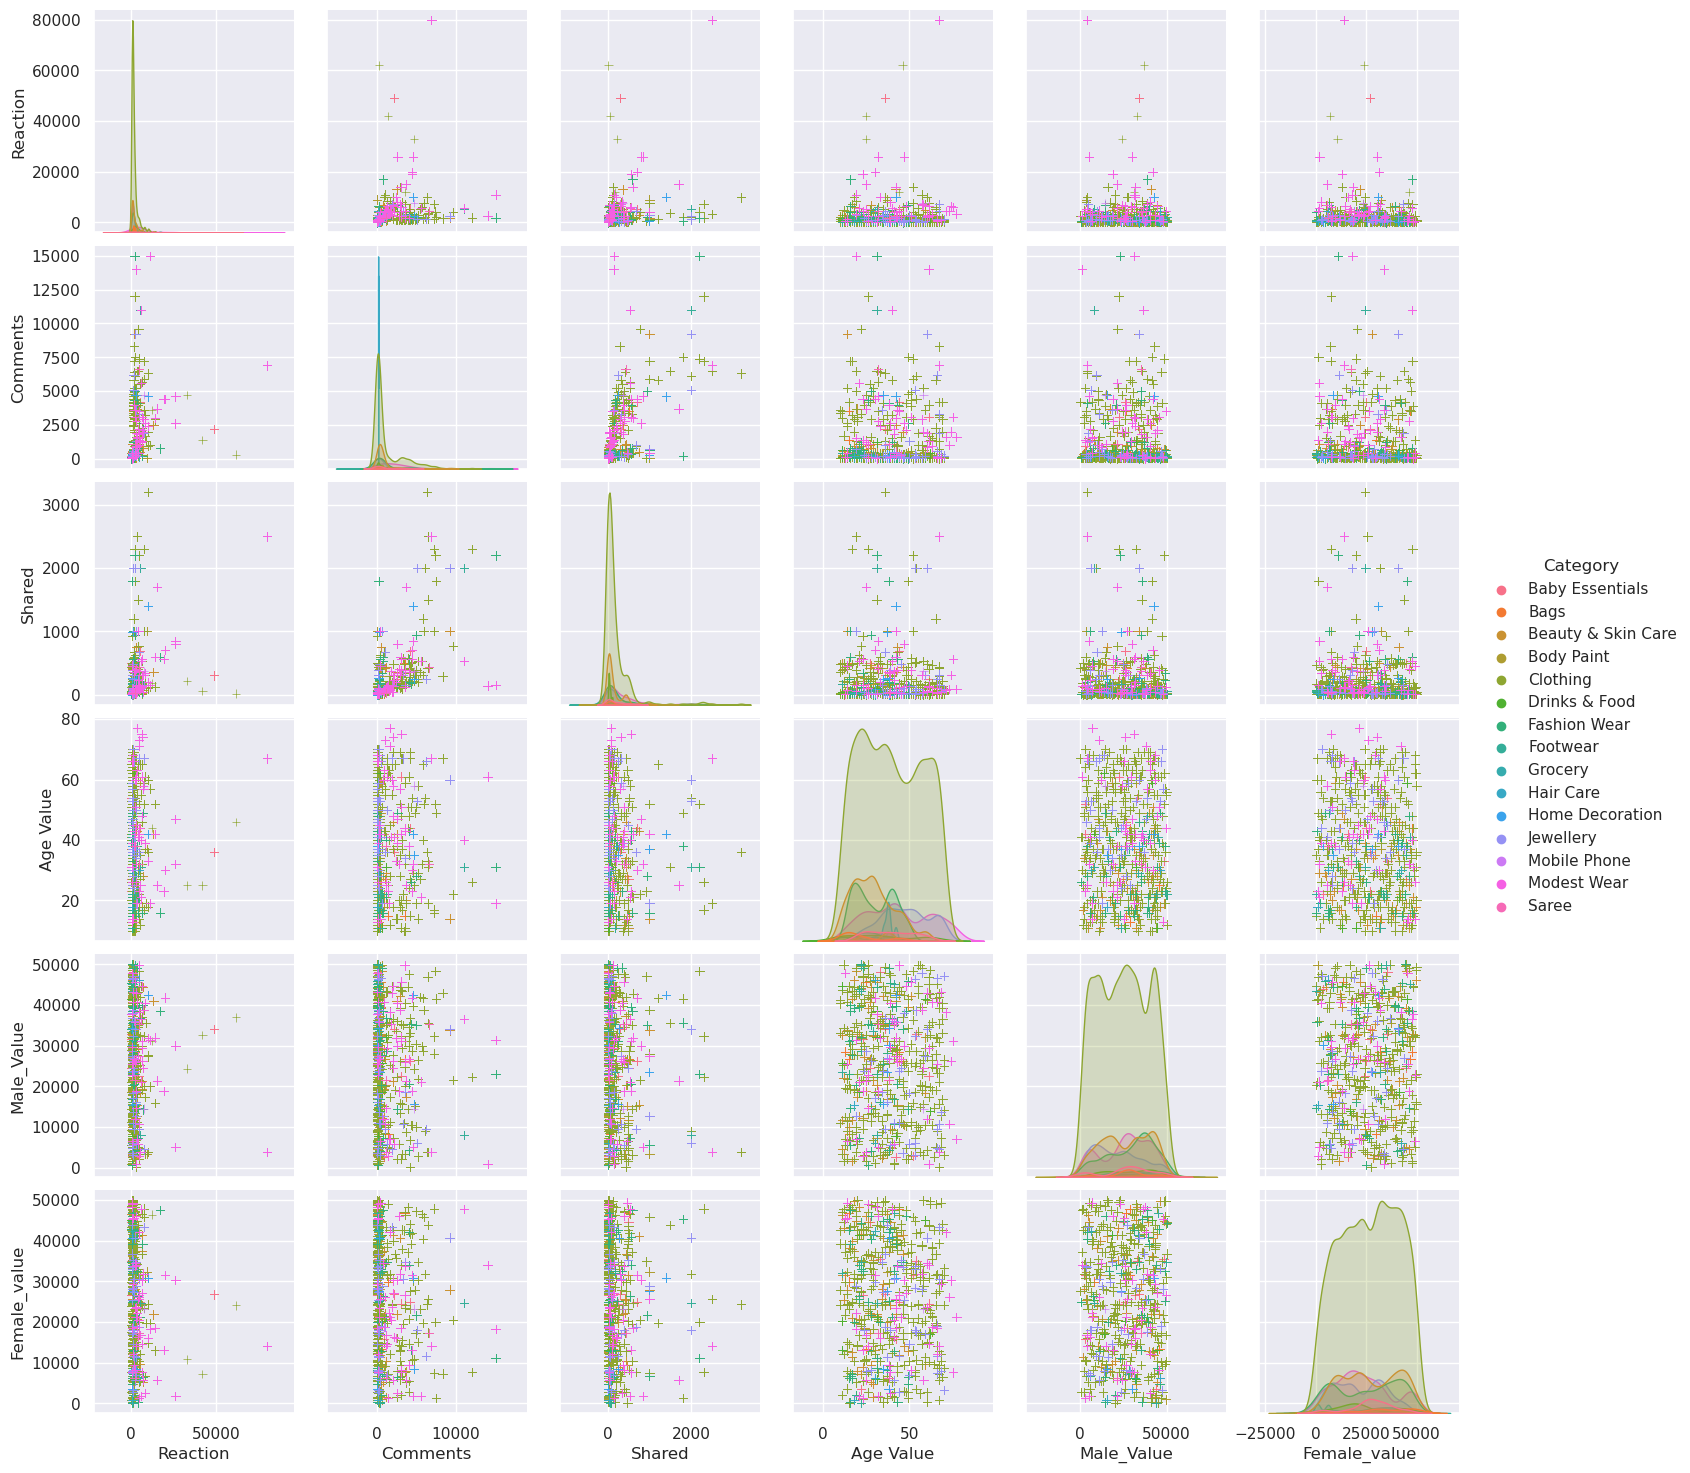

In [8]:
# Thêm các thư viện seaborn và matplotlib

product_measurement_data = ['Category', 'Reaction', 'Comments', 'Shared']

g = sns.pairplot(df, hue='Category', markers='+')
plt.show()